In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import re

In [77]:
utk_twitter_df = pd.read_csv('dataset2/UTKML.csv')
print("UTK Twitter Spam Dataset Loaded Successfully")

hf_comments_df = pd.read_csv('dataset2/huggingface-spam%3Aham%20comments.csv')
print("Hugging Face Comments Dataset Loaded Successfully")

clickbait_df = pd.read_csv('dataset2/clickbait_data.csv')
print("Clickbait Dataset Loaded Successfully")

sms_spam = pd.read_csv('dataset2/sms_spam_data.csv', encoding='ISO-8859-1')
print("SMS Spam Dataset Loaded Successfully")

UTK Twitter Spam Dataset Loaded Successfully
Hugging Face Comments Dataset Loaded Successfully
Clickbait Dataset Loaded Successfully
SMS Spam Dataset Loaded Successfully


Dataset 1

In [20]:
#renaming and dropping the columns that are not needed
pd.set_option('future.no_silent_downcasting', True)

utk_twitter_df = pd.read_csv('dataset2/UTKML.csv')
print("UTK Twitter Spam Dataset Loaded Successfully")
utk_twitter_df.drop(['Id', 'actions', 'is_retweet', 'location'], axis=1, inplace=True)
utk_twitter_df.rename(columns={'Type':'Label'}, inplace=True)
utk_twitter_df['Label'] = utk_twitter_df['Label'].replace({'Spam': 1, 'Quality': 0})
print(utk_twitter_df.shape)
utk_twitter_df.head()

UTK Twitter Spam Dataset Loaded Successfully
(11968, 4)


,Tweet,following,followers,Label
0,It's the everything else that's complicated. #...,0.0,11500.0,0
1,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,0
2,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,0
3,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,1
4,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1


In [21]:
print(utk_twitter_df['Label'].value_counts())

Label
0    6153
1    5815
Name: count, dtype: int64


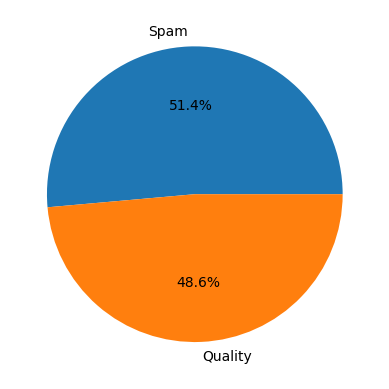

In [22]:
plt.pie(utk_twitter_df['Label'].value_counts(), labels=['Spam', 'Quality'], autopct='%1.1f%%')
plt.show()

distribution countplot

/var/folders/bm/n8tddcjj2137ry1sly4n3ybm0000gn/T/ipykernel_1319/835958114.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=utk_twitter_df, palette='viridis')
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


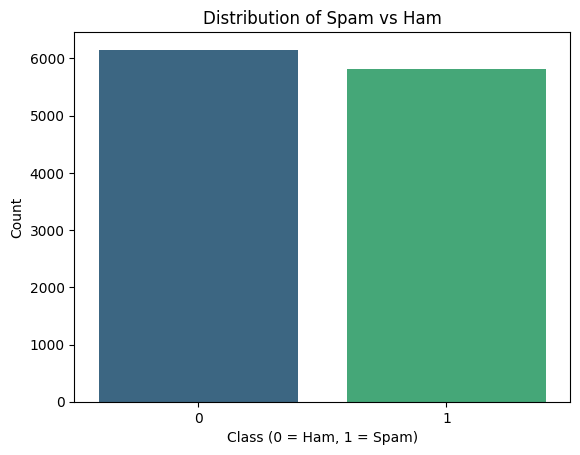

In [23]:
sns.countplot(x='Label', data=utk_twitter_df, palette='viridis')
plt.title("Distribution of Spam vs Ham")
plt.xlabel("Class (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.show()

Dataset 2

In [24]:
pd.set_option('future.no_silent_downcasting', True)
hf_comments_df = pd.read_csv('dataset2/huggingface-spam%3Aham%20comments.csv')
hf_comments_df.drop_duplicates(keep='first', inplace=True)
hf_comments_df.dropna(inplace=True)
print("Hugging Face Comments Dataset Loaded Successfully")
print(hf_comments_df.shape)
hf_comments_df.rename(columns={'label':"Label"}, inplace=True)
hf_comments_df['Label'] = hf_comments_df['Label'].replace({'yes': 1, 'no': 0})
hf_comments_df.head()

Hugging Face Comments Dataset Loaded Successfully
(5311, 2)


,sms,Label
0,Other web is very very best app we are enjoyin...,1
2,Inflation's been taking a bite out of everyone...,0
3,This is a tragic situation through and through...,0
4,Events like this remind us of the chaos inhere...,0
5,The notion that states might not fully publici...,0


In [25]:
print(hf_comments_df['Label'].value_counts())

Label
0    5180
1     131
Name: count, dtype: int64


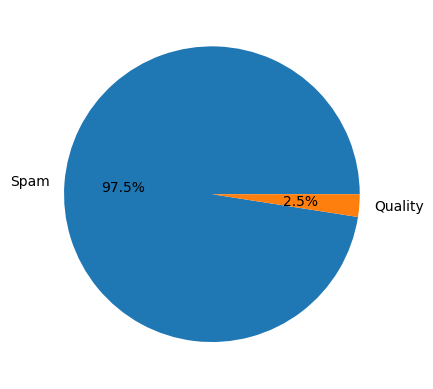

In [26]:
plt.pie(hf_comments_df['Label'].value_counts(), labels=['Spam', 'Quality'], autopct='%1.1f%%')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWa

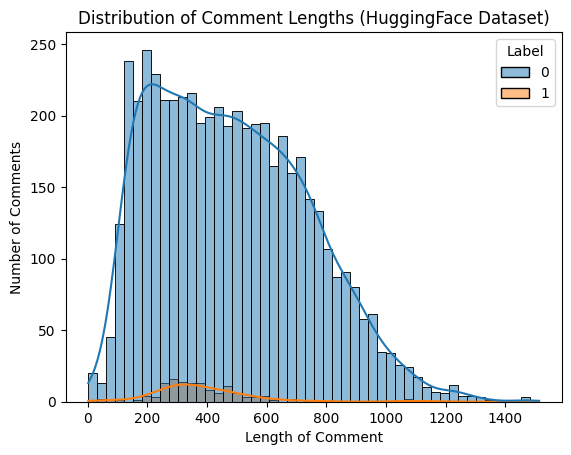

In [27]:
hf_comments_df['text_length'] = hf_comments_df['sms'].astype(str).apply(len)

# Plotting length distribution
sns.histplot(data=hf_comments_df, x='text_length', hue='Label', bins=50, kde=True)
plt.title('Distribution of Comment Lengths (HuggingFace Dataset)')
plt.xlabel('Length of Comment')
plt.ylabel('Number of Comments')
plt.show()

Dataset 3

In [28]:
pd.set_option('future.no_silent_downcasting', True)
clickbait_df = pd.read_csv('dataset2/Clickbait_data.csv')
print("Clickbait Dataset Loaded Successfully")
print(clickbait_df.shape)
clickbait_df.rename(columns={'clickbait':'Label'}, inplace=True)
clickbait_df.head()

Clickbait Dataset Loaded Successfully
(32000, 2)


,headline,Label
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [ ]:
print(clickbait_df['Label'].value_counts())

Label
0    16001
1    15999
Name: count, dtype: int64


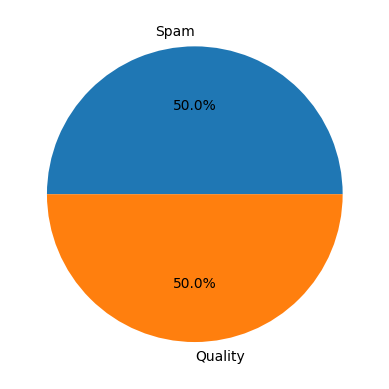

In [30]:
plt.pie(clickbait_df['Label'].value_counts(), labels=['Spam', 'Quality'], autopct='%1.1f%%')
plt.show()

 Most Common Stopwords

In [31]:
stop_words = set(stopwords.words('english'))
spam_tokens = ' '.join(hf_comments_df['sms']).split()
spam_stopword_freq = Counter([word for word in spam_tokens if word.lower() in stop_words])

print("Top 10 Stopwords in HuggingFace Dataset:")
print(spam_stopword_freq.most_common(10))

Top 10 Stopwords in HuggingFace Dataset:
[('the', 23213), ('a', 16876), ('to', 12076), ('of', 10753), ('and', 9849), ('in', 5958), ('that', 5304), ('for', 4992), ('is', 4846), ('on', 3376)]


Word Cloud


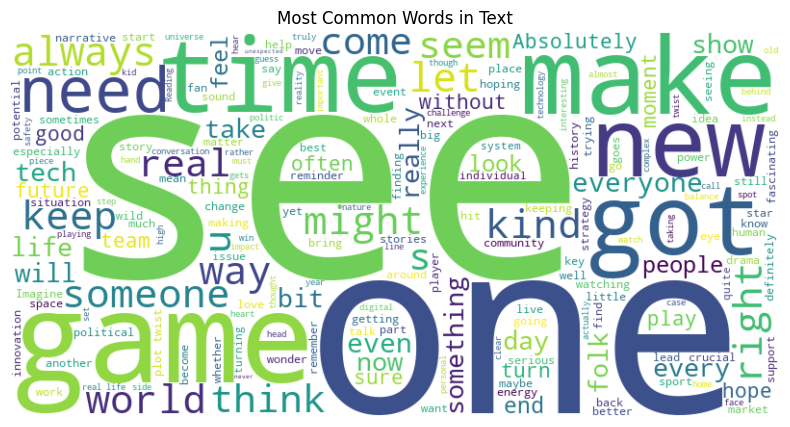

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all text data
text = " ".join(hf_comments_df['sms'].astype(str))

# Define stopwords (optional: you can add more custom ones)
stopwords = set(STOPWORDS)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Text')
plt.show()


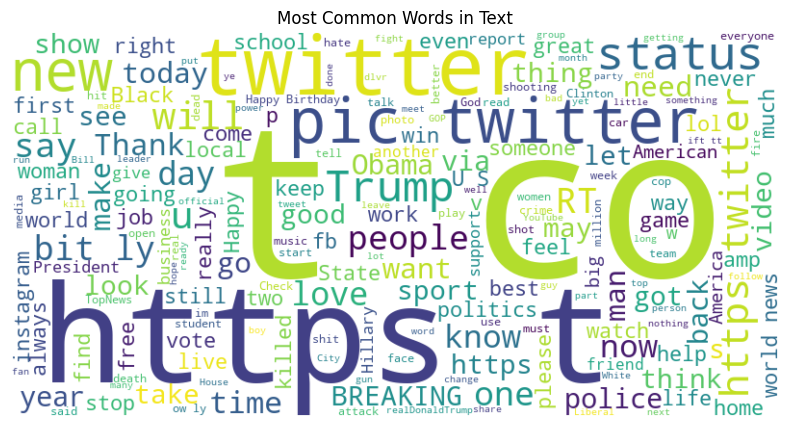

In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all text data
text = " ".join(utk_twitter_df['Tweet'].astype(str))

# Define stopwords (optional: you can add more custom ones)
stopwords = set(STOPWORDS)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Text')
plt.show()


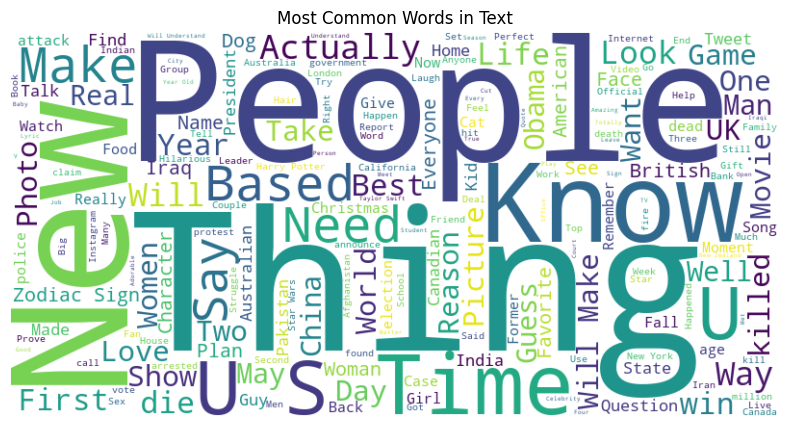

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all text data
text = " ".join(clickbait_df['headline'].astype(str))

# Define stopwords (optional: you can add more custom ones)
stopwords = set(STOPWORDS)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Text')
plt.show()

Bar Plot of Most Frequent Words (With or Without Stopwords)

/var/folders/bm/n8tddcjj2137ry1sly4n3ybm0000gn/T/ipykernel_1319/802497069.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=words_df, palette='viridis')
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/se

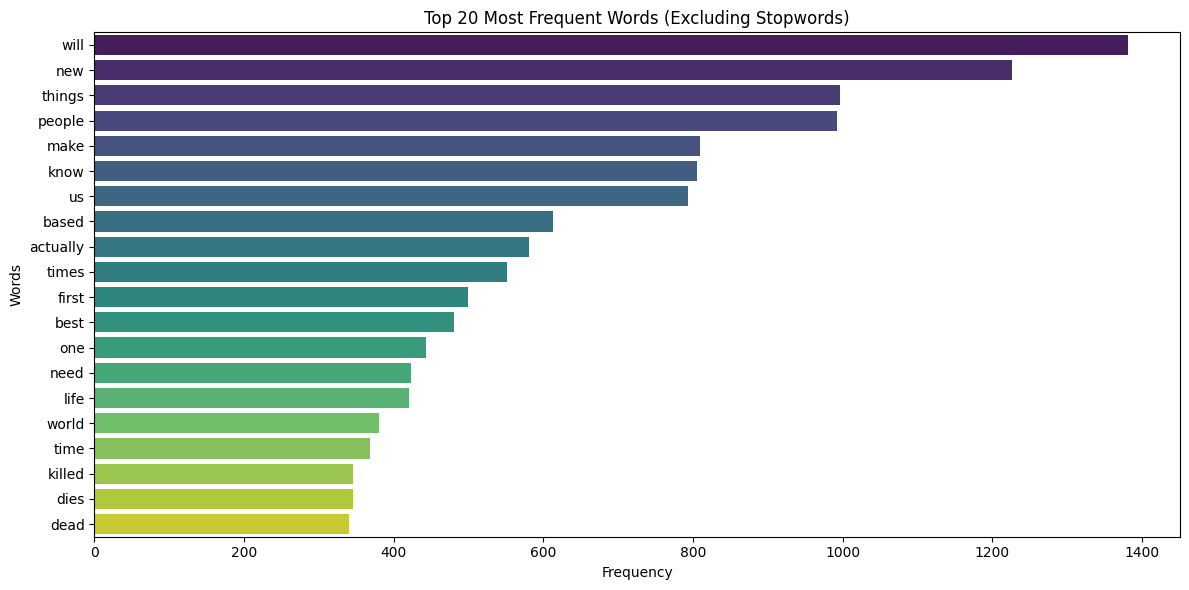

In [35]:
from collections import Counter
import seaborn as sns
import pandas as pd

# Tokenize and filter stopwords
words = " ".join(clickbait_df['headline'].astype(str)).lower().split()
filtered_words = [word for word in words if word not in stopwords and word.isalpha()]

# Count most common words
word_counts = Counter(filtered_words).most_common(20)

# Convert to DataFrame
words_df = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='Word', data=words_df, palette='viridis')
plt.title('Top 20 Most Frequent Words (Excluding Stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()
plt.show()


DATASET 4

In [80]:
pd.set_option('future.no_silent_downcasting', True)
sms_spam = pd.read_csv('dataset2/sms_spam_data.csv', encoding='ISO-8859-1')
print("SMS Spam Dataset Loaded Successfully")
print(sms_spam.shape)
sms_spam.rename(columns={'v1':'Label', 'v2':'message'}, inplace=True)
sms_spam['Label'] = sms_spam['Label'].replace({'spam': 1, 'ham': 0})
sms_spam = sms_spam.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], errors='ignore')
sms_spam.head()

SMS Spam Dataset Loaded Successfully
(5572, 5)


,Label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
print(sms_spam['Label'].value_counts())

Label
0    4825
1     747
Name: count, dtype: int64


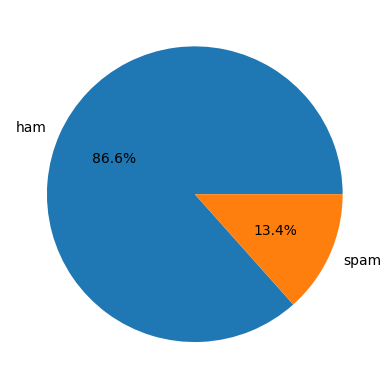

In [73]:
plt.pie(sms_spam['Label'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

TEXT PREPROCESSING

Lowercasing

In [37]:
utk_twitter_df['Tweet'] = utk_twitter_df['Tweet'].str.lower()
utk_twitter_df.head()

,Tweet,following,followers,Label
0,it's the everything else that's complicated. #...,0.0,11500.0,0
1,eren sent a glare towards mikasa then nodded a...,0.0,0.0,0
2,i posted a new photo to facebook http://fb.me/...,0.0,0.0,0
3,#jan idiot chelsea handler diagnoses trump wit...,3319.0,611.0,1
4,pedophile anthony weiner is terrified of getti...,4840.0,1724.0,1


In [38]:
hf_comments_df['sms'] = hf_comments_df['sms'].str.lower()
hf_comments_df.head()

,sms,Label,text_length
0,other web is very very best app we are enjoyin...,1,57
2,inflation's been taking a bite out of everyone...,0,1061
3,this is a tragic situation through and through...,0,616
4,events like this remind us of the chaos inhere...,0,752
5,the notion that states might not fully publici...,0,674


In [39]:
clickbait_df['headline'] = clickbait_df['headline'].str.lower()
clickbait_df.head()

,headline,Label
0,should i get bings,1
1,which tv female friend group do you belong in,1
2,"the new ""star wars: the force awakens"" trailer...",1
3,"this vine of new york on ""celebrity big brothe...",1
4,a couple did a stunning photo shoot with their...,1


In [81]:
sms_spam['message'] = sms_spam['message'].str.lower()
sms_spam.head()

,Label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


Removing punctuations and special characters

In [ ]:
utk_twitter_df['Tweet'] = utk_twitter_df['Tweet'].astype(str).apply(lambda x: re.sub(r'[^a-z\s]', '', x))
hf_comments_df['sms'] = hf_comments_df['sms'].astype(str).apply(lambda x: re.sub(r'[^a-z\s]', '', x))
clickbait_df['headline'] = clickbait_df['headline'].astype(str).apply(lambda x: re.sub(r'[^a-z\s]', '', x))

clickbait_df.head()

,headline,Label
0,should i get bings,1
1,which tv female friend group do you belong in,1
2,the new star wars the force awakens trailer is...,1
3,this vine of new york on celebrity big brother...,1
4,a couple did a stunning photo shoot with their...,1


In [83]:
sms_spam['message'] = sms_spam['message'].astype(str).apply(lambda x: re.sub(r'[^a-z\s]', '', x))
sms_spam.head()

,Label,message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


Tokenization

In [ ]:
hf_comments_df['sms'] = hf_comments_df['sms'].apply(lambda x: x.split())
clickbait_df['headline'] = clickbait_df['headline'].apply(lambda x: x.split())
utk_twitter_df['Tweet'] = utk_twitter_df['Tweet'].apply(lambda x: x.split())

In [ ]:
sms_spam['message'] = sms_spam['message'].apply(lambda x:x.split())

Stop word removal

In [42]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
utk_twitter_df['Tweet'] = utk_twitter_df['Tweet'].apply(lambda x: [word for word in x if word not in stop_words])
hf_comments_df['sms'] = hf_comments_df['sms'].apply(lambda x: [word for word in x if word not in stop_words])
clickbait_df['headline'] = clickbait_df['headline'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
sms_spam['message'] = sms_spam['message'].apply(lambda x: [word for word in x if word not in stop_words])

Stemming

In [43]:
ps = PorterStemmer()
utk_twitter_df['Tweet'] = utk_twitter_df['Tweet'].apply(lambda x: [ps.stem(word) for word in x])
hf_comments_df['sms'] = hf_comments_df['sms'].apply(lambda x: [ps.stem(word) for word in x])
clickbait_df['headline'] = clickbait_df['headline'].apply(lambda x: [ps.stem(word) for word in x])


In [88]:
sms_spam['message'] = sms_spam['message'].apply(lambda x: [ps.stem(word) for word in x])

Rejoining Tokens into Cleaned Text

In [44]:
utk_twitter_df['Tweet'] = utk_twitter_df['Tweet'].apply(lambda x: ' '.join(x))
hf_comments_df['sms'] = hf_comments_df['sms'].apply(lambda x: ' '.join(x))
clickbait_df['headline'] = clickbait_df['headline'].apply(lambda x: ' '.join(x))

In [89]:
sms_spam['message'] = sms_spam['message'].apply(lambda x: ' '.join(x))

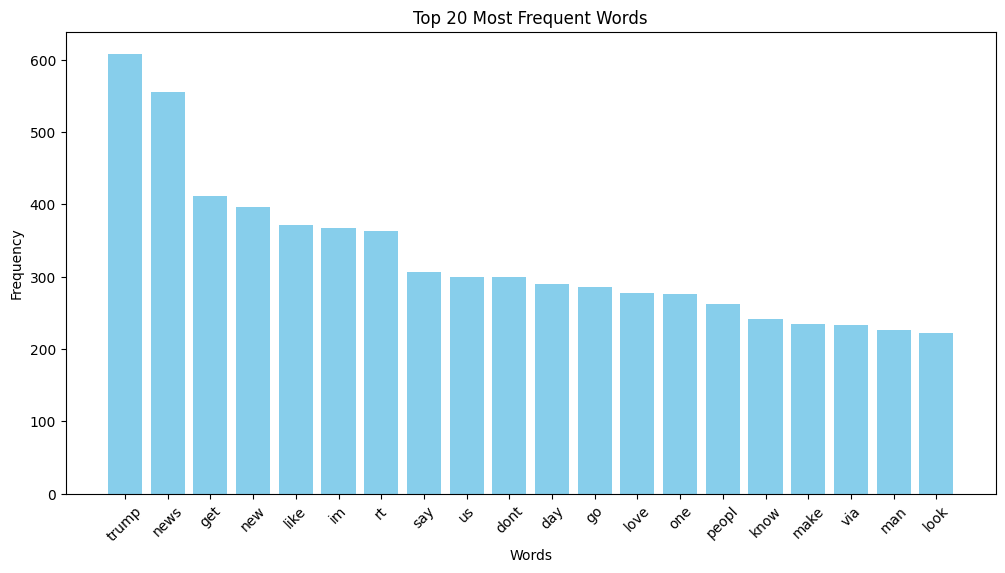

In [45]:
all_words = ' '.join(utk_twitter_df['Tweet']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


Before Resampling: Counter({0: 16001, 1: 15999})
After Resampling: Counter({1: 15256, 0: 840})


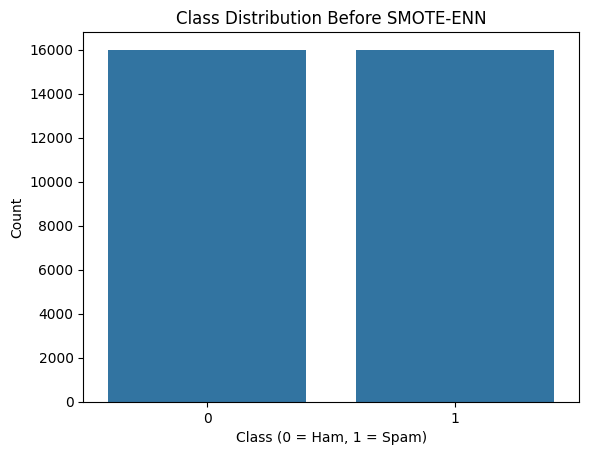

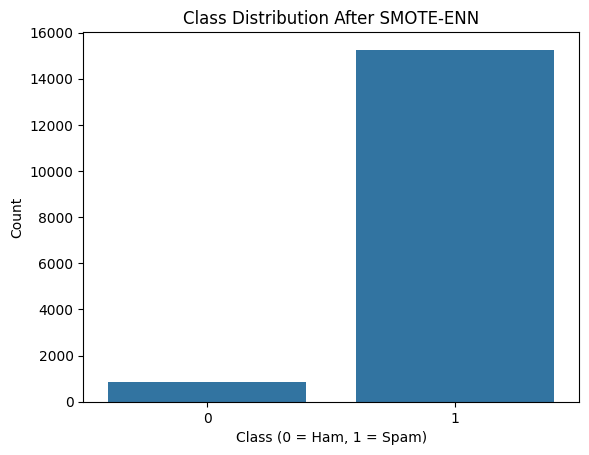

In [46]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split


X = clickbait_df['headline']
y = clickbait_df['Label']

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_tfidf, y)

print("Before Resampling:", Counter(y))
print("After Resampling:", Counter(y_resampled))

# Before SMOTE-ENN
sns.countplot(x=y)
plt.title("Class Distribution Before SMOTE-ENN")
plt.xlabel("Class (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.show()

# After SMOTE-ENN
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE-ENN")
plt.xlabel("Class (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.show()

In [47]:
print(utk_twitter_df['Label'].value_counts())

Label
0    6153
1    5815
Name: count, dtype: int64


MODEL IMPLEMENTATION PHASE

UTKML DATASET

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

vectorizer = TfidfVectorizer()
text_data = utk_twitter_df['Tweet'].astype(str)
labels = utk_twitter_df['Label'].astype(int)
X = vectorizer.fit_transform(text_data)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel="linear", gamma="scale", probability=True, random_state=2),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model  # Store trained model for later evaluation
    print(f"{name} model trained successfully.")


UTKML DATASET MODEL EVALUATION RESULTS

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    log_loss, hamming_loss, cohen_kappa_score, fbeta_score, jaccard_score
)

evaluation_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    evaluation_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None,
        "Log Loss": log_loss(y_test, y_proba) if y_proba is not None else None,
        "Hamming Loss": hamming_loss(y_test, y_pred),
        "Kappa Score": cohen_kappa_score(y_test, y_pred),
        "F2 Score": fbeta_score(y_test, y_pred, beta=2),
        "Jaccard Score": jaccard_score(y_test, y_pred)
    }

for model_name, metrics in evaluation_results.items():
    print(f"\n{model_name} Evaluation:")
    for metric_name, score in metrics.items():
        if score is not None:
            print(f"{metric_name}: {score:.4f}")

In [50]:
'''
UTKML DATASET RESULTS

Accuracy = [0.8204, 0.7669, 0.5021, 0.8183, 0.8112, 0.8041, 0.7736]
Precision = [0.8432, 0.7954, 1.0000, 0.8816, 0.8780, 0.8838, 0.8884]
Recall = [0.7868, 0.7182, 0.0033, 0.7349, 0.7224, 0.6998, 0.6254]
F1 = [0.8140, 0.7548, 0.0067, 0.8016, 0.7927, 0.7811, 0.7341]
ROC_AUC = [0.8987, 0.7669, 0.5096, 0.8975, 0.8849, 0.8733, 0.8513]
Log_Loss = [0.4553, 1.0000*, 1.0000*, -> (8.4012, 17.5833), 0.4052, 0.4737, 0.7220, 0.4788]
Hamming_Loss = [0.1796, 0.2331, 0.4979, 0.1817, 0.1888, 0.1959, 0.2264]
Kappa = [0.6407, 0.5338, 0.0033, 0.6365, 0.6223, 0.6081, 0.5471]
F2 = [0.7975, 0.7324, 0.0042, 0.7602, 0.7490, 0.7302, 0.6648]
Jaccard = [0.6864, 0.6062, 0.0033, 0.6689, 0.6565, 0.6409, 0.5798]
'''


'\nUTKML DATASET RESULTS\n\nAccuracy = [0.8204, 0.7669, 0.5021, 0.8183, 0.8112, 0.8041, 0.7736]\nPrecision = [0.8432, 0.7954, 1.0000, 0.8816, 0.8780, 0.8838, 0.8884]\nRecall = [0.7868, 0.7182, 0.0033, 0.7349, 0.7224, 0.6998, 0.6254]\nF1 = [0.8140, 0.7548, 0.0067, 0.8016, 0.7927, 0.7811, 0.7341]\nROC_AUC = [0.8987, 0.7669, 0.5096, 0.8975, 0.8849, 0.8733, 0.8513]\nLog_Loss = [0.4553, 1.0000*, 1.0000*, -> (8.4012, 17.5833), 0.4052, 0.4737, 0.7220, 0.4788]\nHamming_Loss = [0.1796, 0.2331, 0.4979, 0.1817, 0.1888, 0.1959, 0.2264]\nKappa = [0.6407, 0.5338, 0.0033, 0.6365, 0.6223, 0.6081, 0.5471]\nF2 = [0.7975, 0.7324, 0.0042, 0.7602, 0.7490, 0.7302, 0.6648]\nJaccard = [0.6864, 0.6062, 0.0033, 0.6689, 0.6565, 0.6409, 0.5798]\n'

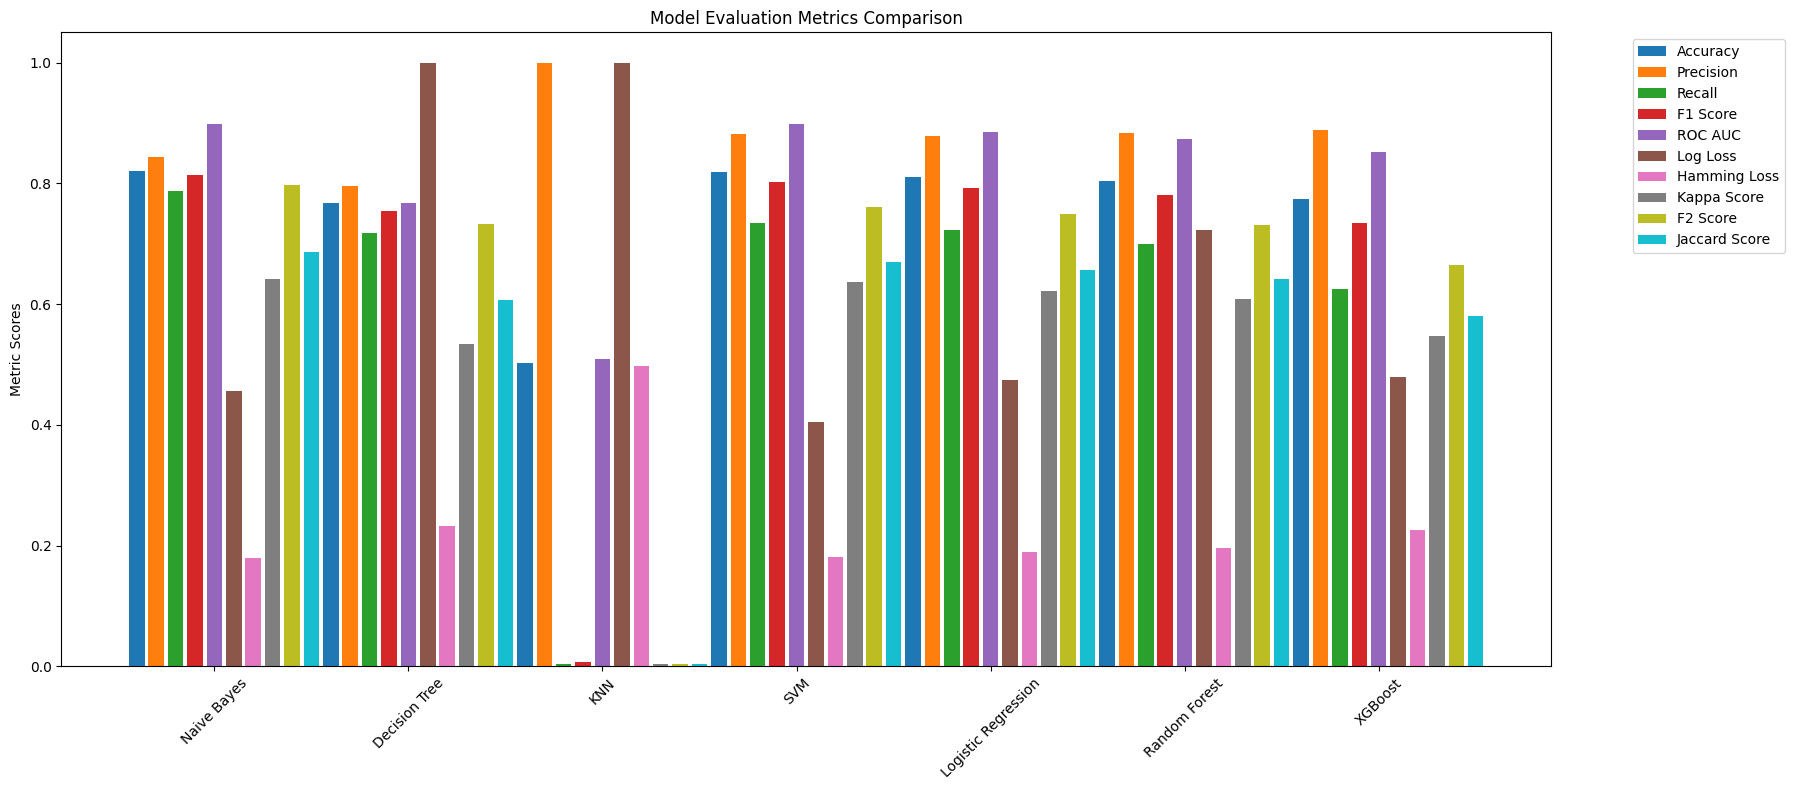

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['Naive Bayes', 'Decision Tree', 'KNN', 'SVM', 'Logistic Regression', 'Random Forest', 'XGBoost']

# Metrics (converted to float for plotting)
Accuracy = [0.8204, 0.7669, 0.5021, 0.8183, 0.8112, 0.8041, 0.7736]
Precision = [0.8432, 0.7954, 1.0000, 0.8816, 0.8780, 0.8838, 0.8884]
recall = [0.7868, 0.7182, 0.0033, 0.7349, 0.7224, 0.6998, 0.6254]
f1_score = [0.8140, 0.7548, 0.0067, 0.8016, 0.7927, 0.7811, 0.7341]
roc_auc = [0.8987, 0.7669, 0.5096, 0.8975, 0.8849, 0.8733, 0.8513]
log_loss = [0.4553, 1.0000, 1.0000, 0.4052, 0.4737, 0.7220, 0.4788]
hamming_loss = [0.1796, 0.2331, 0.4979, 0.1817, 0.1888, 0.1959, 0.2264]
kappa = [0.6407, 0.5338, 0.0033, 0.6365, 0.6223, 0.6081, 0.5471]
f2_score = [0.7975, 0.7324, 0.0042, 0.7602, 0.7490, 0.7302, 0.6648]
jaccard_score = [0.6864, 0.6062, 0.0033, 0.6689, 0.6565, 0.6409, 0.5798]

# Bar width and positions
x = np.arange(len(models))
bar_width = 0.08

# Plotting all metrics
plt.figure(figsize=(18, 8))

plt.bar(x - 0.4, Accuracy, width=bar_width, label='Accuracy')
plt.bar(x - 0.3, Precision, width=bar_width, label='Precision')
plt.bar(x - 0.2, recall, width=bar_width, label='Recall')
plt.bar(x - 0.1, f1_score, width=bar_width, label='F1 Score')
plt.bar(x, roc_auc, width=bar_width, label='ROC AUC')
plt.bar(x + 0.1, log_loss, width=bar_width, label='Log Loss')
plt.bar(x + 0.2, hamming_loss, width=bar_width, label='Hamming Loss')
plt.bar(x + 0.3, kappa, width=bar_width, label='Kappa Score')
plt.bar(x + 0.4, f2_score, width=bar_width, label='F2 Score')
plt.bar(x + 0.5, jaccard_score, width=bar_width, label='Jaccard Score')

# Formatting
plt.xticks(x, models, rotation=45)
plt.ylabel('Metric Scores')
plt.title('Model Evaluation Metrics Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


HF DATASET

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

vectorizer = TfidfVectorizer()
text_data = hf_comments_df['sms'].astype(str)
labels = hf_comments_df['Label'].astype(int)
X = vectorizer.fit_transform(text_data)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel="linear", gamma="scale", probability=True, random_state=2),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model  # Store trained model for later evaluation
    print(f"{name} model trained successfully.")


Naive Bayes model trained successfully.
Decision Tree model trained successfully.
KNN model trained successfully.
SVM model trained successfully.
Logistic Regression model trained successfully.
Random Forest model trained successfully.


/opt/homebrew/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.


HF MODEL EVALUATION RESULTS

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    log_loss, hamming_loss, cohen_kappa_score, fbeta_score, jaccard_score
)

evaluation_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    evaluation_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None,
        "Log Loss": log_loss(y_test, y_proba) if y_proba is not None else None,
        "Hamming Loss": hamming_loss(y_test, y_pred),
        "Kappa Score": cohen_kappa_score(y_test, y_pred),
        "F2 Score": fbeta_score(y_test, y_pred, beta=2),
        "Jaccard Score": jaccard_score(y_test, y_pred)
    }

# for model_name, metrics in evaluation_results.items():
#     print(f"\n{model_name} Evaluation:")
#     for metric_name, score in metrics.items():
#         if score is not None:
#             print(f"{metric_name}: {score:.4f}")
result_lst = []
for model_name, metrics in evaluation_results.items():
        print(f"\n{model_name} Evaluation:")
        for metric_name, score in metrics.items():
            if metric_name == "Precision":
                if score is not None:
                    # print(f"{metric_name}: {score:.4f}")
                    result_lst.append(f"{score:.4f}")
                
print(result_lst)

In [58]:
'''HF COMMENTS RESULTS 

Accuracy = ['0.9784', '0.9944', '0.9868', '0.9972', '0.9906', '0.9944', '0.9944']
Precision = ['1.0000', '0.8462', '1.0000', '0.9565', '1.0000', '1.0000', '0.9091']
Recall = ['0.0417', '0.9167', '0.4167', '0.9167', '0.5833', '0.7500',  '0.8333']
F1_score = ['0.0800', '0.9167', '0.5882', '0.9362', '0.7368', '0.8571', '0.8696']
ROC_AUC = ['0.9573', '0.9574', '0.9769', '0.9710', '0.9664', '0.9887', '0.9698']
Log_Loss = ['0.0767', '0.1356', '0.0531', '0.0119', '0.0350', '0.0220', '0.0228']
Hamming_loss = ['0.0216', '0.0038', '0.0132', '0.0028', '0.0094', '0.0056', '0.0056']
Kappa = ['0.0783', '0.9147', '0.5827', '0.9347', '0.7324', '0.8543', '0.8667']
F2 = ['0.0515', '0.9167', '0.4717', '0.9244', '0.6364', '0.7895', '0.8475']
Jaccard = ['0.0417', '0.8462', '0.4167', '0.8800', '0.5833', '0.7500', '0.7692']'''

"HF COMMENTS RESULTS \n\nAccuracy = ['0.9784', '0.9944', '0.9868', '0.9972', '0.9906', '0.9944', '0.9944']\nPrecision = ['1.0000', '0.8462', '1.0000', '0.9565', '1.0000', '1.0000', '0.9091']\nRecall = ['0.0417', '0.9167', '0.4167', '0.9167', '0.5833', '0.7500',  '0.8333']\nF1_score = ['0.0800', '0.9167', '0.5882', '0.9362', '0.7368', '0.8571', '0.8696']\nROC_AUC = ['0.9573', '0.9574', '0.9769', '0.9710', '0.9664', '0.9887', '0.9698']\nLog_Loss = ['0.0767', '0.1356', '0.0531', '0.0119', '0.0350', '0.0220', '0.0228']\nHamming_loss = ['0.0216', '0.0038', '0.0132', '0.0028', '0.0094', '0.0056', '0.0056']\nKappa = ['0.0783', '0.9147', '0.5827', '0.9347', '0.7324', '0.8543', '0.8667']\nF2 = ['0.0515', '0.9167', '0.4717', '0.9244', '0.6364', '0.7895', '0.8475']\nJaccard = ['0.0417', '0.8462', '0.4167', '0.8800', '0.5833', '0.7500', '0.7692']"

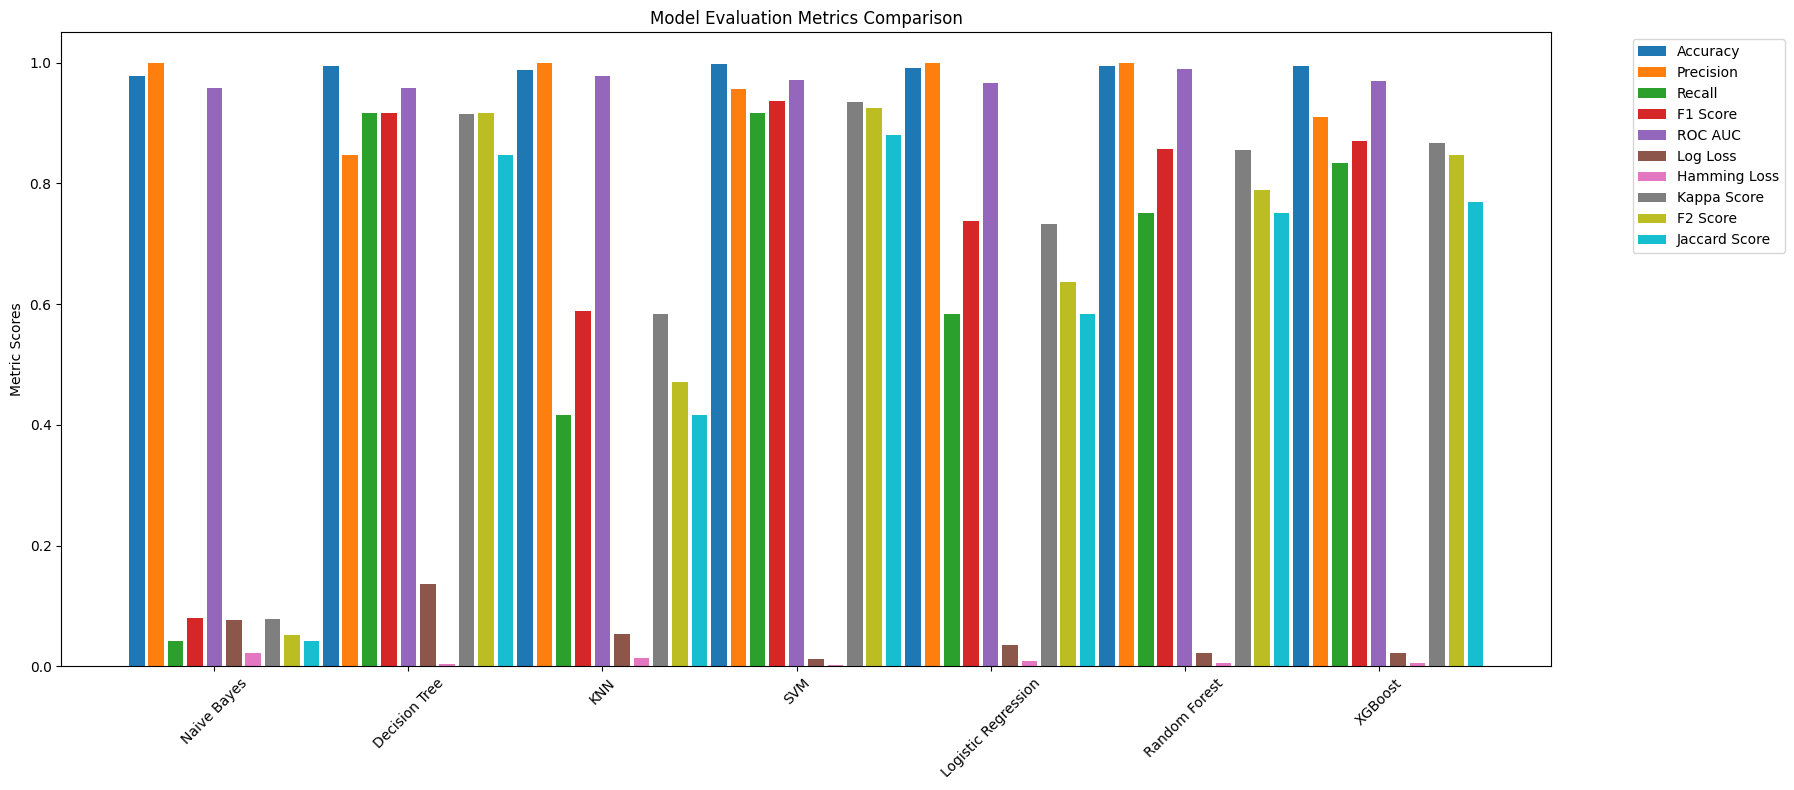

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['Naive Bayes', 'Decision Tree', 'KNN', 'SVM', 'Logistic Regression', 'Random Forest', 'XGBoost']

# Metrics (converted to float for plotting)
accuracy = [0.9784, 0.9944, 0.9868, 0.9972, 0.9906, 0.9944, 0.9944]
precision = [1.0000, 0.8462, 1.0000, 0.9565, 1.0000, 1.0000, 0.9091]
recall = [0.0417, 0.9167, 0.4167, 0.9167, 0.5833, 0.7500, 0.8333]
f1_score = [0.0800, 0.9167, 0.5882, 0.9362, 0.7368, 0.8571, 0.8696]
roc_auc = [0.9573, 0.9574, 0.9769, 0.9710, 0.9664, 0.9887, 0.9698]
log_loss = [0.0767, 0.1356, 0.0531, 0.0119, 0.0350, 0.0220, 0.0228]
hamming_loss = [0.0216, 0.0038, 0.0132, 0.0028, 0.0094, 0.0056, 0.0056]
kappa = [0.0783, 0.9147, 0.5827, 0.9347, 0.7324, 0.8543, 0.8667]
f2_score = [0.0515, 0.9167, 0.4717, 0.9244, 0.6364, 0.7895, 0.8475]
jaccard_score = [0.0417, 0.8462, 0.4167, 0.8800, 0.5833, 0.7500, 0.7692]

# Bar width and positions
x = np.arange(len(models))
bar_width = 0.08

# Plotting all metrics
plt.figure(figsize=(18, 8))

plt.bar(x - 0.4, accuracy, width=bar_width, label='Accuracy')
plt.bar(x - 0.3, precision, width=bar_width, label='Precision')
plt.bar(x - 0.2, recall, width=bar_width, label='Recall')
plt.bar(x - 0.1, f1_score, width=bar_width, label='F1 Score')
plt.bar(x, roc_auc, width=bar_width, label='ROC AUC')
plt.bar(x + 0.1, log_loss, width=bar_width, label='Log Loss')
plt.bar(x + 0.2, hamming_loss, width=bar_width, label='Hamming Loss')
plt.bar(x + 0.3, kappa, width=bar_width, label='Kappa Score')
plt.bar(x + 0.4, f2_score, width=bar_width, label='F2 Score')
plt.bar(x + 0.5, jaccard_score, width=bar_width, label='Jaccard Score')

# Formatting
plt.xticks(x, models, rotation=45)
plt.ylabel('Metric Scores')
plt.title('Model Evaluation Metrics Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


CLICKBAIT DATASET

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

vectorizer = TfidfVectorizer()
text_data = clickbait_df['headline'].astype(str)
labels = clickbait_df['Label'].astype(int)
X = vectorizer.fit_transform(text_data)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel="linear", gamma="scale", probability=True, random_state=2),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model  # Store trained model for later evaluation
    print(f"{name} model trained successfully.")


Naive Bayes model trained successfully.
Decision Tree model trained successfully.
KNN model trained successfully.
SVM model trained successfully.
Logistic Regression model trained successfully.
Random Forest model trained successfully.


/opt/homebrew/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.


CLICKBAIT DATASET MODEL EVALUATION PHASE RESULTS

In [62]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    log_loss, hamming_loss, cohen_kappa_score, fbeta_score, jaccard_score
)

evaluation_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    evaluation_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None,
        "Log Loss": log_loss(y_test, y_proba) if y_proba is not None else None,
        "Hamming Loss": hamming_loss(y_test, y_pred),
        "Kappa Score": cohen_kappa_score(y_test, y_pred),
        "F2 Score": fbeta_score(y_test, y_pred, beta=2),
        "Jaccard Score": jaccard_score(y_test, y_pred)
    }

for model_name, metrics in evaluation_results.items():
    print(f"\n{model_name} Evaluation:")
    for metric_name, score in metrics.items():
        if score is not None:
            print(f"{metric_name}: {score:.4f}")


Naive Bayes Evaluation:
Accuracy: 0.9594
Precision: 0.9564
Recall: 0.9646
F1 Score: 0.9605
ROC AUC: 0.9921
Log Loss: 0.1517
Hamming Loss: 0.0406
Kappa Score: 0.9187
F2 Score: 0.9629
Jaccard Score: 0.9239

Decision Tree Evaluation:
Accuracy: 0.8952
Precision: 0.8786
Recall: 0.9224
F1 Score: 0.9000
ROC AUC: 0.8945
Log Loss: 3.7790
Hamming Loss: 0.1048
Kappa Score: 0.7900
F2 Score: 0.9133
Jaccard Score: 0.8182

KNN Evaluation:
Accuracy: 0.5456
Precision: 0.5295
Recall: 0.9997
F1 Score: 0.6923
ROC AUC: 0.8953
Log Loss: 3.3918
Hamming Loss: 0.4544
Kappa Score: 0.0715
F2 Score: 0.8489
Jaccard Score: 0.5294

SVM Evaluation:
Accuracy: 0.9547
Precision: 0.9662
Recall: 0.9444
F1 Score: 0.9552
ROC AUC: 0.9903
Log Loss: 0.1248
Hamming Loss: 0.0453
Kappa Score: 0.9094
F2 Score: 0.9487
Jaccard Score: 0.9142

Logistic Regression Evaluation:
Accuracy: 0.9480
Precision: 0.9673
Recall: 0.9297
F1 Score: 0.9481
ROC AUC: 0.9883
Log Loss: 0.2030
Hamming Loss: 0.0520
Kappa Score: 0.8960
F2 Score: 0.9370
Jac

In [63]:
'''
CLICKBAIT RESULTS

Accuracy = [0.9594, 0.8895, 0.5456, 0.9547, 0.9480, 0.9280, 0.8809]
Precision = [0.9564, 0.8769, 0.5295, 0.9662, 0.9673, 0.9192, 0.9567]
Recall = [0.9646, 0.9120, 0.9997, 0.9444, 0.9297, 0.9419, 0.8035]
F1 = [0.9605, 0.8941, 0.6923, 0.9552, 0.9481, 0.9304, 0.8735]
ROC_AUC = [0.9921, 0.8890, 0.8953, 0.9903, 0.9883, 0.9795, 0.9586]
Log_Loss = [0.1517, 1.000*, 1.0000*, -> (3.9817, 3.3918), 0.1248, 0.2030, 0.2018, 0.3201]
Hamming_Loss = [0.0406, 0.1105, 0.4544, 0.0453, 0.0520, 0.0720, 0.1191]
Kappa = [0.9187, 0.7787, 0.0715, 0.9094, 0.8960, 0.8558, 0.7626]
F2 = [0.9629, 0.9048, 0.8489, 0.9487, 0.9370, 0.9373, 0.8301]
Jaccard = [0.9239, 0.8085, 0.5294, 0.9142, 0.9370, 0.8699, 0.7754]
'''

'\nCLICKBAIT RESULTS\n\nAccuracy = [0.9594, 0.8895, 0.5456, 0.9547, 0.9480, 0.9280, 0.8809]\nPrecision = [0.9564, 0.8769, 0.5295, 0.9662, 0.9673, 0.9192, 0.9567]\nRecall = [0.9646, 0.9120, 0.9997, 0.9444, 0.9297, 0.9419, 0.8035]\nF1 = [0.9605, 0.8941, 0.6923, 0.9552, 0.9481, 0.9304, 0.8735]\nROC_AUC = [0.9921, 0.8890, 0.8953, 0.9903, 0.9883, 0.9795, 0.9586]\nLog_Loss = [0.1517, 1.000*, 1.0000*, -> (3.9817, 3.3918), 0.1248, 0.2030, 0.2018, 0.3201]\nHamming_Loss = [0.0406, 0.1105, 0.4544, 0.0453, 0.0520, 0.0720, 0.1191]\nKappa = [0.9187, 0.7787, 0.0715, 0.9094, 0.8960, 0.8558, 0.7626]\nF2 = [0.9629, 0.9048, 0.8489, 0.9487, 0.9370, 0.9373, 0.8301]\nJaccard = [0.9239, 0.8085, 0.5294, 0.9142, 0.9370, 0.8699, 0.7754]\n'

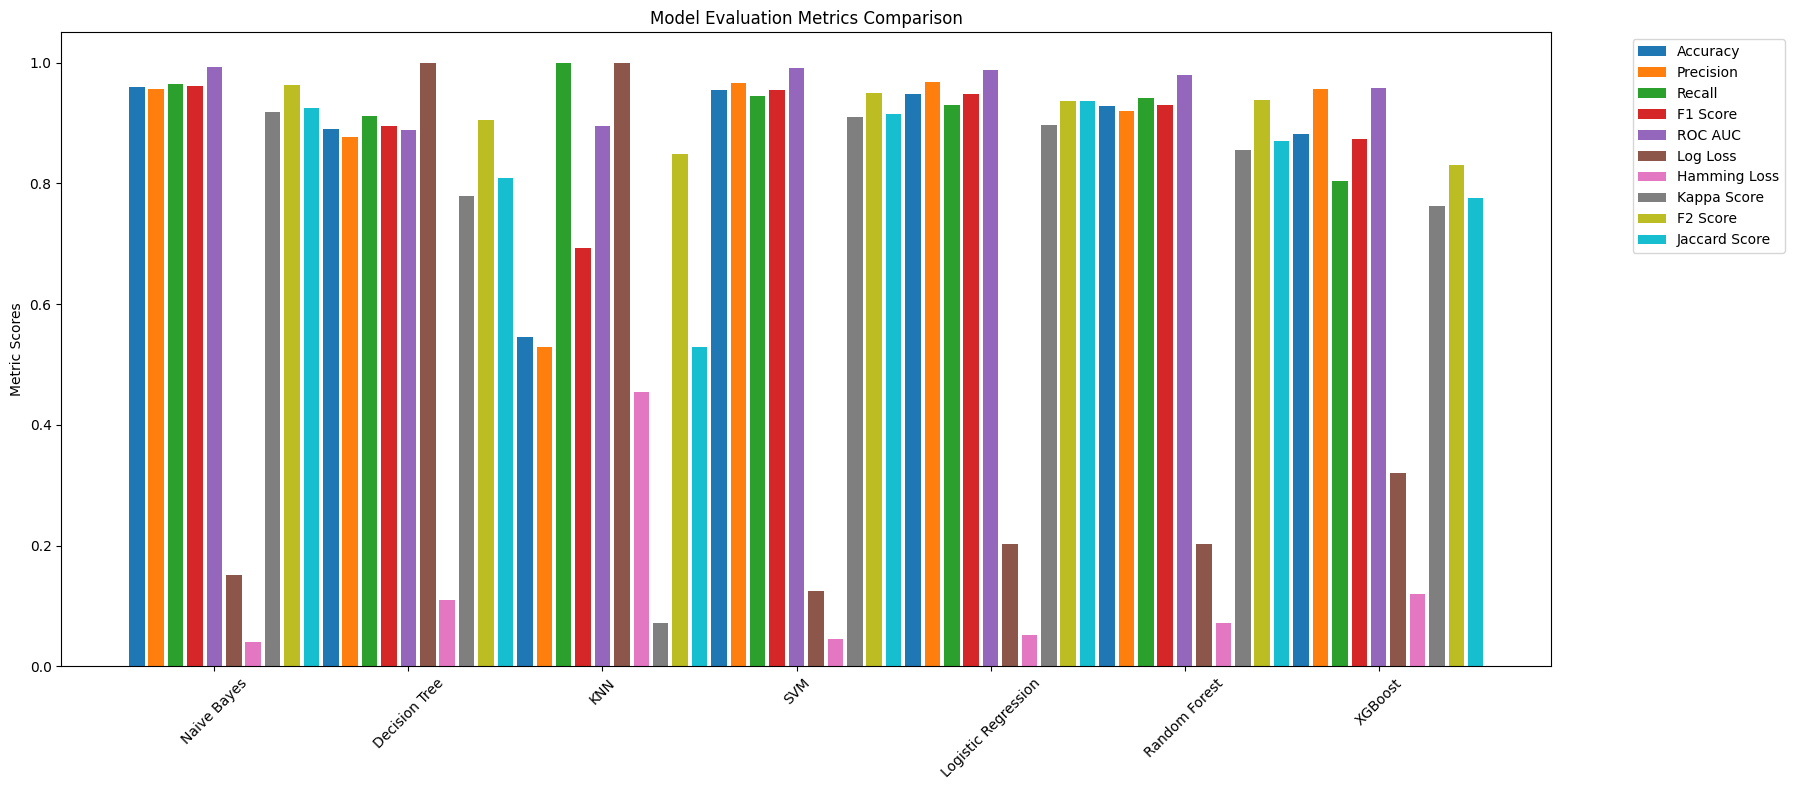

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['Naive Bayes', 'Decision Tree', 'KNN', 'SVM', 'Logistic Regression', 'Random Forest', 'XGBoost']

# Metrics (converted to float for plotting)
accuracy = [0.9594, 0.8895, 0.5456, 0.9547, 0.9480, 0.9280, 0.8809]
precision = [0.9564, 0.8769, 0.5295, 0.9662, 0.9673, 0.9192, 0.9567]
recall = [0.9646, 0.9120, 0.9997, 0.9444, 0.9297, 0.9419, 0.8035]
f1_score = [0.9605, 0.8941, 0.6923, 0.9552, 0.9481, 0.9304, 0.8735]
roc_auc = [0.9921, 0.8890, 0.8953, 0.9903, 0.9883, 0.9795, 0.9586]
log_loss = [0.1517, 1.0000, 1.0000, 0.1248, 0.2030, 0.2018, 0.3201]
hamming_loss = [0.0406, 0.1105, 0.4544, 0.0453, 0.0520, 0.0720, 0.1191]
kappa = [0.9187, 0.7787, 0.0715, 0.9094, 0.8960, 0.8558, 0.7626]
f2_score = [0.9629, 0.9048, 0.8489, 0.9487, 0.9370, 0.9373, 0.8301]
jaccard_score = [0.9239, 0.8085, 0.5294, 0.9142, 0.9370, 0.8699, 0.7754]

# Bar width and positions
x = np.arange(len(models))
bar_width = 0.08

# Plotting all metrics
plt.figure(figsize=(18, 8))

plt.bar(x - 0.4, accuracy, width=bar_width, label='Accuracy')
plt.bar(x - 0.3, precision, width=bar_width, label='Precision')
plt.bar(x - 0.2, recall, width=bar_width, label='Recall')
plt.bar(x - 0.1, f1_score, width=bar_width, label='F1 Score')
plt.bar(x, roc_auc, width=bar_width, label='ROC AUC')
plt.bar(x + 0.1, log_loss, width=bar_width, label='Log Loss')
plt.bar(x + 0.2, hamming_loss, width=bar_width, label='Hamming Loss')
plt.bar(x + 0.3, kappa, width=bar_width, label='Kappa Score')
plt.bar(x + 0.4, f2_score, width=bar_width, label='F2 Score')
plt.bar(x + 0.5, jaccard_score, width=bar_width, label='Jaccard Score')

# Formatting
plt.xticks(x, models, rotation=45)
plt.ylabel('Metric Scores')
plt.title('Model Evaluation Metrics Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


SMS COLLECTION DATASET

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

vectorizer = TfidfVectorizer()
text_data = sms_spam['message'].astype(str)
labels = sms_spam['Label'].astype(int)
X = vectorizer.fit_transform(text_data)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel="linear", gamma="scale", probability=True, random_state=2),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model  # Store trained model for later evaluation
    print(f"{name} model trained successfully.")


Naive Bayes model trained successfully.
Decision Tree model trained successfully.
KNN model trained successfully.
SVM model trained successfully.
Logistic Regression model trained successfully.
Random Forest model trained successfully.


/opt/homebrew/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:35:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.


SMS COLLECTION DATASET MODEL EVALUATION PHASE RESULTS

In [91]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    log_loss, hamming_loss, cohen_kappa_score, fbeta_score, jaccard_score
)

evaluation_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    evaluation_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None,
        "Log Loss": log_loss(y_test, y_proba) if y_proba is not None else None,
        "Hamming Loss": hamming_loss(y_test, y_pred),
        "Kappa Score": cohen_kappa_score(y_test, y_pred),
        "F2 Score": fbeta_score(y_test, y_pred, beta=2),
        "Jaccard Score": jaccard_score(y_test, y_pred)
    }

for model_name, metrics in evaluation_results.items():
    print(f"\n{model_name} Evaluation:")
    for metric_name, score in metrics.items():
        if score is not None:
            print(f"{metric_name}: {score:.4f}")


Naive Bayes Evaluation:
Accuracy: 0.9659
Precision: 1.0000
Recall: 0.7467
F1 Score: 0.8550
ROC AUC: 0.9801
Log Loss: 0.1196
Hamming Loss: 0.0341
Kappa Score: 0.8361
F2 Score: 0.7865
Jaccard Score: 0.7467

Decision Tree Evaluation:
Accuracy: 0.9605
Precision: 0.8397
Recall: 0.8733
F1 Score: 0.8562
ROC AUC: 0.9237
Log Loss: 1.4224
Hamming Loss: 0.0395
Kappa Score: 0.8334
F2 Score: 0.8664
Jaccard Score: 0.7486

KNN Evaluation:
Accuracy: 0.9265
Precision: 1.0000
Recall: 0.4533
F1 Score: 0.6239
ROC AUC: 0.8267
Log Loss: 1.7142
Hamming Loss: 0.0735
Kappa Score: 0.5894
F2 Score: 0.5090
Jaccard Score: 0.4533

SVM Evaluation:
Accuracy: 0.9767
Precision: 0.9769
Recall: 0.8467
F1 Score: 0.9071
ROC AUC: 0.9892
Log Loss: 0.0714
Hamming Loss: 0.0233
Kappa Score: 0.8939
F2 Score: 0.8699
Jaccard Score: 0.8301

Logistic Regression Evaluation:
Accuracy: 0.9471
Precision: 0.9596
Recall: 0.6333
F1 Score: 0.7631
ROC AUC: 0.9865
Log Loss: 0.1431
Hamming Loss: 0.0529
Kappa Score: 0.7347
F2 Score: 0.6795
Jac

In [ ]:
'''
SMS SPAM RESULTS

accuracy = [0.9659, 0.9605, 0.9265, 0.9767, 0.9471, 0.9722, 0.9695] 
precision = [1.0000, 0.8397, 1.0000, 0.9769, 0.9596, 0.9917, 0.9531] 
recall = [0.7467, 0.8733, 0.4533, 0.8467, 0.6333, 0.8000, 0.8133] 
f1_score = [0.8550, 0.8562, 0.6239, 0.9071, 0.7631, 0.8856, 0.8777] 
roc_auc = [0.9801, 0.9237, 0.8267, 0.9892, 0.9865, 0.9853, 0.9763] 
log_Loss = [0.1196, 1.4224, 1.7142, 0.0714, 0.1431, 0.1392, 0.0898] 
hamming_Loss = [0.0341, 0.0395, 0.0735, 0.0233, 0.0529, 0.0278, 0.0305] 
Kappa = [0.8361, 0.8334, 0.5894, 0.8939, 0.7347, 0.8700, 0.8604] 
f2_score = [0.7865, 0.8664, 0.5090, 0.8699, 0.6795, 0.8322, 0.8379] 
jaccard_score = [0.7467, 0.7486, 0.4533, 0.8301, 0.6169, 0.7947, 0.7821]
'''

In [93]:
'''
accuracy = [0.9659, 0.9605, 0.9265, 0.9767, 0.9471, 0.9722, 0.9695] 
precision = [1.0000, 0.8397, 1.0000, 0.9769, 0.9596, 0.9917, 0.9531] 
recall = [0.7467, 0.8733, 0.4533, 0.8467, 0.6333, 0.8000, 0.8133] 
f1_score = [0.8550, 0.8562, 0.6239, 0.9071, 0.7631, 0.8856, 0.8777] 
roc_auc = [0.9801, 0.9237, 0.8267, 0.9892, 0.9865, 0.9853, 0.9763] 
log_Loss = [0.1196, 1.4224, 1.7142, 0.0714, 0.1431, 0.1392, 0.0898] 
hamming_Loss = [0.0341, 0.0395, 0.0735, 0.0233, 0.0529, 0.0278, 0.0305] 
Kappa = [0.8361, 0.8334, 0.5894, 0.8939, 0.7347, 0.8700, 0.8604] 
f2_score = [0.7865, 0.8664, 0.5090, 0.8699, 0.6795, 0.8322, 0.8379] 
jaccard_score = [0.7467, 0.7486, 0.4533, 0.8301, 0.6169, 0.7947, 0.7821]
'''

'\naccuracy = [0.9659, 0.9605, 0.9265, 0.9767, 0.9471, 0.9722, 0.9695] \nprecision = [1.0000, 0.8397, 1.0000, 0.9769, 0.9596, 0.9917, 0.9531] \nrecall = [0.7467, 0.8733, 0.4533, 0.8467, 0.6333, 0.8000, 0.8133] \nf1_score = [0.8550, 0.8562, 0.6239, 0.9071, 0.7631, 0.8856, 0.8777] \nroc_auc = [0.9801, 0.9237, 0.8267, 0.9892, 0.9865, 0.9853, 0.9763] \nlog_Loss = [0.1196, 1.4224, 1.7142, 0.0714, 0.1431, 0.1392, 0.0898] \nhamming_Loss = [0.0341, 0.0395, 0.0735, 0.0233, 0.0529, 0.0278, 0.0305] \nKappa = [0.8361, 0.8334, 0.5894, 0.8939, 0.7347, 0.8700, 0.8604] \nf2_score = [0.7865, 0.8664, 0.5090, 0.8699, 0.6795, 0.8322, 0.8379] \njaccard_score = [0.7467, 0.7486, 0.4533, 0.8301, 0.6169, 0.7947, 0.7821]\n'

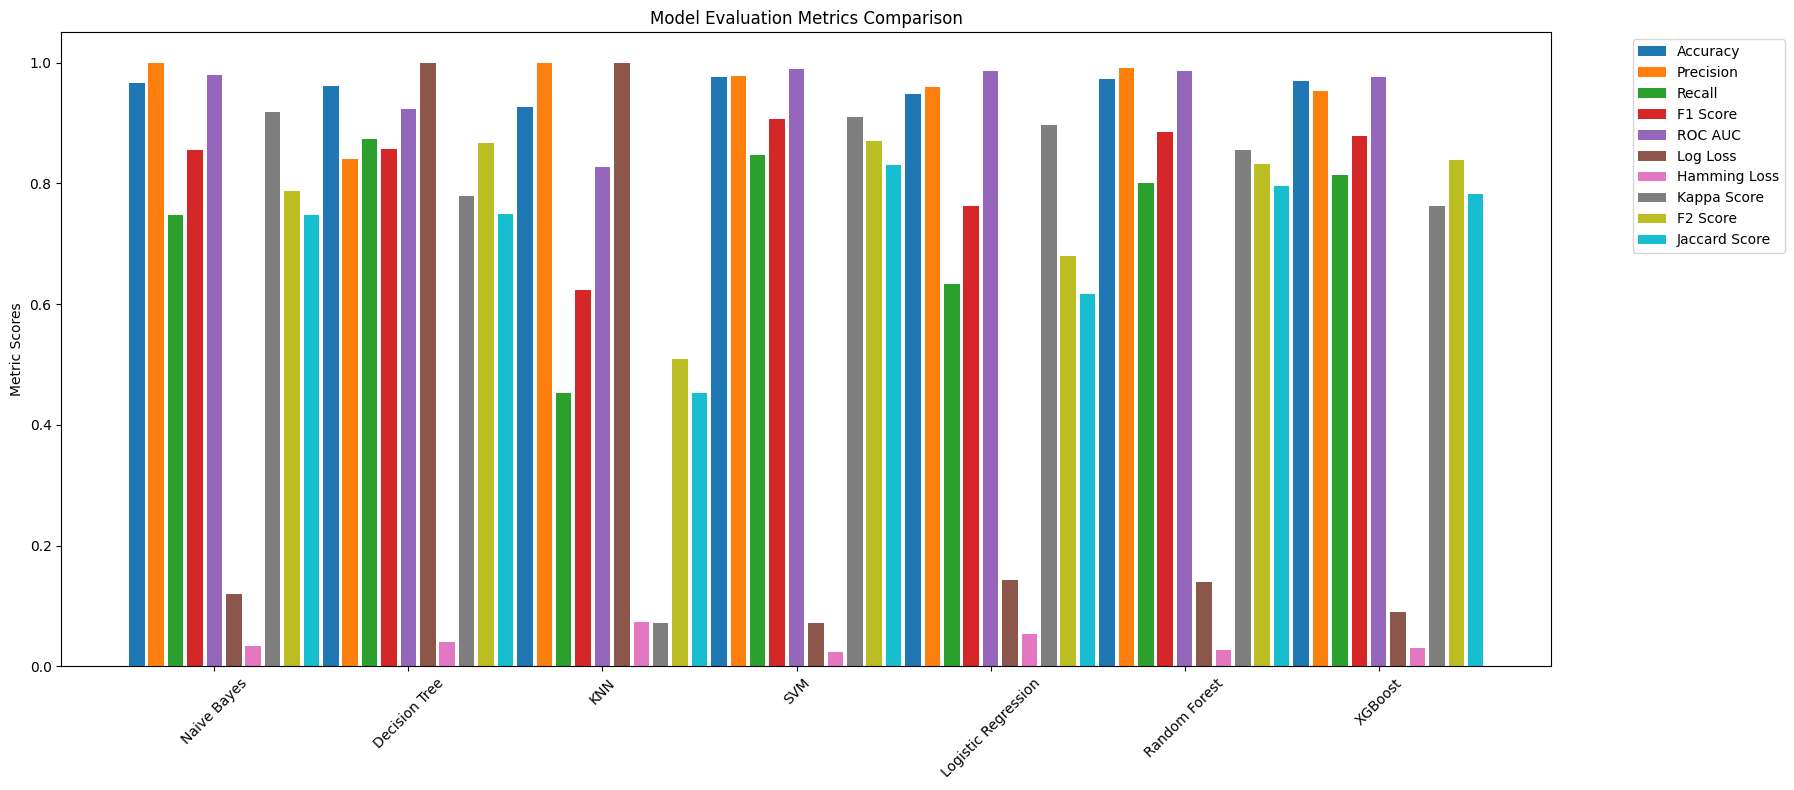

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['Naive Bayes', 'Decision Tree', 'KNN', 'SVM', 'Logistic Regression', 'Random Forest', 'XGBoost']

# Metrics
accuracy = [0.9659, 0.9605, 0.9265, 0.9767, 0.9471, 0.9722, 0.9695] 
precision = [1.0000, 0.8397, 1.0000, 0.9769, 0.9596, 0.9917, 0.9531] 
recall = [0.7467, 0.8733, 0.4533, 0.8467, 0.6333, 0.8000, 0.8133] 
f1_score = [0.8550, 0.8562, 0.6239, 0.9071, 0.7631, 0.8856, 0.8777] 
roc_auc = [0.9801, 0.9237, 0.8267, 0.9892, 0.9865, 0.9853, 0.9763] 
log_loss = [0.1196, 1.000, 1.000, 0.0714, 0.1431, 0.1392, 0.0898] 
hamming_loss = [0.0341, 0.0395, 0.0735, 0.0233, 0.0529, 0.0278, 0.0305] 
Kappa = [0.8361, 0.8334, 0.5894, 0.8939, 0.7347, 0.8700, 0.8604] 
f2_score = [0.7865, 0.8664, 0.5090, 0.8699, 0.6795, 0.8322, 0.8379] 
jaccard_score = [0.7467, 0.7486, 0.4533, 0.8301, 0.6169, 0.7947, 0.7821]

# Bar width and positions
x = np.arange(len(models))
bar_width = 0.08

# Plotting all metrics
plt.figure(figsize=(18, 8))

plt.bar(x - 0.4, accuracy, width=bar_width, label='Accuracy')
plt.bar(x - 0.3, precision, width=bar_width, label='Precision')
plt.bar(x - 0.2, recall, width=bar_width, label='Recall')
plt.bar(x - 0.1, f1_score, width=bar_width, label='F1 Score')
plt.bar(x, roc_auc, width=bar_width, label='ROC AUC')
plt.bar(x + 0.1, log_loss, width=bar_width, label='Log Loss')
plt.bar(x + 0.2, hamming_loss, width=bar_width, label='Hamming Loss')
plt.bar(x + 0.3, kappa, width=bar_width, label='Kappa Score')
plt.bar(x + 0.4, f2_score, width=bar_width, label='F2 Score')
plt.bar(x + 0.5, jaccard_score, width=bar_width, label='Jaccard Score')

# Formatting
plt.xticks(x, models, rotation=45)
plt.ylabel('Metric Scores')
plt.title('Model Evaluation Metrics Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
